This notebook developed out of hotspot_polarizatioin_plot.ipynb. In attempting to reproduce Zach Gelle's FIG 7 and FIG 8, Alejandro realized 
that we had been graphing the plot for a hotspot, instead of a point source, which is what Zach is doing. So now, we want to graph the plot
of a point source, for the purpose of finding out whether AART code can truly reproduce Zach's results. 

In [1]:
# first, we import the necessary libraries
from aart_func import *
from params import *
import b_transformer as bt


# we check if the inclination and spin is indeed as we specified in params.py
print(spin_case)
print(i_case)

# we transform the local magnetic field to the observer magnetic field and print it out. 
b_observer_array = bt.b_local_to_observer_transform(0, 0, 1, 6)
print(b_observer_array)




Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

0.02
20
[ 0.          0.          0.         -0.16666667 20.        ]


In [ ]:
# now we run lensingbands.py
!python3 lensingbands.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands


In [2]:
# now we read in the results of lensingbands.py
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()

# note that, for our purpose (to produce Q and U loops), only the array supergrid0 is relevant. We do no need to use any other arrays. 
# Thus, let's see what supergrid0 looks like.

print(supergrid0.shape)
print(mask0.shape)

Reading file:  ./Results/LensingBands_a_0.02_i_20.h5
(6250000, 2)
(6250000,)


In [4]:
# run raytracing.py
!python3 raytracing.py



Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.02_i_30.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.02_i_30.h5  created.

A total of 18750000 photons were ray-traced


In [3]:
# and now we read in the results of raytracing.py

fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]


h5f.close()

print(rs0.shape)


Reading file:  ./Results/Rays_a_0.02_i_20.h5
(6250000,)


In [4]:
# we run polarization.py
!python3 polarization.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Polarization
Reading file:  ./Results/LensingBands_a_0.02_i_20.h5
Reading file:  ./Results/Rays_a_0.02_i_20.h5
File  ./Results/Polarization_a_0.02_i_20.h5  created.


In [6]:
# read in polarization.py, as we do here:

fnpolarization = "./Results/Polarization_a_%s_i_%s.h5"%(spin_case, i_case)

print("Reading file: ", fnpolarization)

h5f = h5py.File(fnpolarization, 'r')

penrosewalker = h5f['PK'][:]
EVPA_x = h5f['EVPA_x'][:]
EVPA_y = h5f['EVPA_y'][:]
             
h5f.close()

print(penrosewalker.shape)
print(EVPA_x)
print(EVPA_y)


Reading file:  ./Results/Polarization_a_0.02_i_20.h5
(2500, 2500)
[[ -5.24798273  -5.24603734  -5.24409444 ... -10.07746417 -10.08322696
  -10.08899222]
 [ -5.24663908  -5.2446916   -5.24274662 ... -10.0793747  -10.08514206
  -10.09091189]
 [ -5.24529597  -5.2433464   -5.24139934 ... -10.08129008 -10.08706201
  -10.09283641]
 ...
 [  5.67898818   5.6753603    5.67173586 ...  13.58616191  13.59549825
   13.60483728]
 [  5.67898078   5.67535809   5.67173883 ...  13.57743312  13.58675884
   13.5960872 ]
 [  5.67897797   5.67536046   5.67174637 ...  13.56872751  13.57804257
   13.58736031]]
[[2.97181087 2.97149702 2.97118302 ... 1.87027469 1.86990603 1.86953758]
 [2.97207593 2.97176184 2.9714476  ... 1.86939697 1.86902799 1.86865921]
 [2.97234139 2.97202706 2.97171258 ... 1.86851794 1.86814863 1.86777952]
 ...
 [2.42758831 2.42848371 2.42937997 ... 5.48431059 5.48457529 5.48483941]
 [2.42825922 2.42915385 2.43004934 ... 5.48124768 5.48151266 5.48177702]
 [2.42892868 2.42982254 2.43071726 .

Now, we wish to use equation 47 on page 12 of Zach's paper. There are two quantities falpha, and fbeta. We have to find their corresponding variables
in AART. We compare two equations: 1. Equation 31 on page 6 of Zach's paper. 2. Equation 5 on page 6 of Alejandro and Hengrui's paper. Zach's formula is as follows $$ (f^\alpha, f^\beta) = \frac{1}{\mu^2 + \beta^2} (\beta k_2 - \mu k_1, \beta k_1 + \mu k_2)$$ 

Comparing with AART code, we only have to modify line 96, and we see that EVPA_x and EVPA_y, returned by polarization_f.py, corresponds to falpha and fbeta

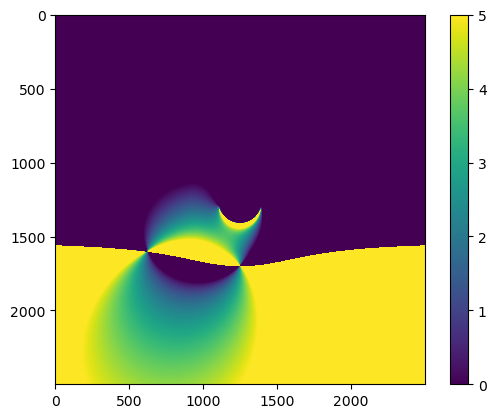

In [7]:

# now, we may compute falpha
falpha = EVPA_x

# similarly, we compute fbeta
fbeta = EVPA_y

plt.imshow(falpha, vmax=5, vmin=0)
plt.colorbar()
plt.show()



Next, we may compute the Q and U arrays with equation 47 on page 12 of Zach's paper: $Q = (f^\beta)^2 - (f^\alpha)^2$, $U = -2f^{\alpha} f^{\beta}$

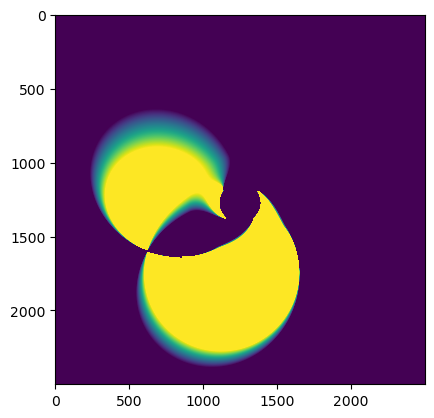

In [8]:
# first, we compute the Q array
Q = (fbeta)**2 - (falpha)**2

# then, we compute the U array
U = (-2) * falpha * fbeta

plt.imshow(Q, vmax = 5, vmin = 0)
plt.show()

Now we have a problem: Currently, I have a Q and U array calculated from falpha and fbeta, which are in turn calculated from equation 31 in Zach's paper. If I were to trace a loop, falpha and fbeta would have to depend on a variable that changes with the motion of the hotspot point source. But falpha and fbeta, according to equation 31, only depends on beta, mu, kappa1, and kappa2, which do not change with the motion of the hotspot point source.

The solution to this is rather simple: I now have two arrays, Q and U, both of dimension (3000, 3000). This essentially means that I have a Q value and a U value for each of the 9000000 points on the observer screen. Now, I want to choose points on the observer screen that correspond to a value of r=6, and 0<phi<360 on the source plane. Once I have those points, I can get the Q and U values associated with those points. Next, I plot these Q and U values in Q, U space, where each point in the Q, U space is the Q value and V value associated with the same point on the observer plane.

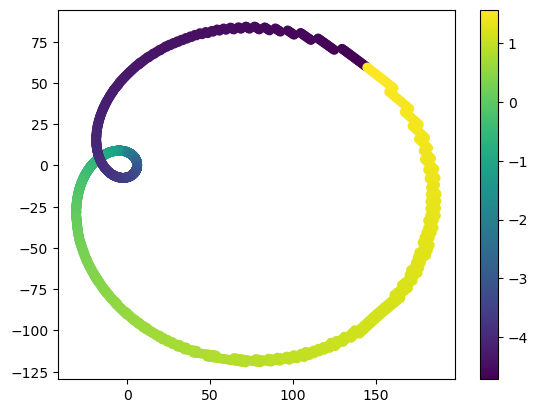

In [10]:
rs0_2d = rs0.reshape(2500, 2500).T
phi0_2d = phi0.reshape(2500, 2500).T


# Q_1d = Q.reshape(-1)
# U_1d = U.reshape(-1)


indices_rs0 = np.where((rs0_2d > 5.99) & (rs0_2d < 6.01))
# indices_phi0 = np.where((phi0_2d < i + 0.001) & (phi0_2d > i - 0.001))

Q_phi0 = Q[indices_rs0]
U_phi0 = U[indices_rs0]
phi0_r = phi0_2d[indices_rs0]

plt.scatter(Q_phi0, U_phi0, c=phi0_r)
plt.colorbar()
plt.show()

In [ ]:

# # Q_r = Q_1d[rs0 < 6.01 and rs0 > 5.99]
# Q_final = Q_1d[(rs0 > 5.9999) & (rs0 < 6.0001)]

# # U_r = U_1d[rs0 < 6.01]
# U_final = U_1d[(rs0 > 5.9999) & (rs0 < 6.0001)]

# print(Q_final.shape)
# print(U_final.shape)






# rs0_reshaped = rs0.reshape(3000, 3000)
# print(rs0_reshaped.shape)

# Q_r = Q[rs0_reshaped < 6.01]
# Q_final = Q_r[rs0_reshaped > 5.99]
# U_r = U[rs0_reshaped < 6.01]
# U_final = U_r[rs0_reshaped > 5.99]



# print(Q_final.shape)
# print(U_final.shape)




# # here we set all alpha coordinates that do not correspond to rs0=6 to 0

# alpha[rs0>6.01] = 0
# alpha[rs0<5.99] = 0


# # next, we do the same for beta

# beta[rs0>6.01] = 0
# beta[rs0<5.99] = 0

# alpha_reshaped = alpha.reshape(3000, 3000)
# beta_reshaped = beta.reshape(3000, 3000)

# condition1 = (alpha_reshaped == 0)
# condition2 = (beta_reshaped == 0)

# print(Q.shape)

# Q[condition1] = 0
# Q[condition2] = 0
# U[condition1] = 0
# U[condition2] = 0

# print(Q.shape)

# Q_r = Q[Q != 0]
# U_r = U[U != 0]

# print(Q_r.shape)
# print(U_r.shape)